The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class1D
The data folder is: /home/ucecabj/Desktop/MFI_git/MFI_class1D/_data_temp/convergence_analysis/
The MFI grid was: 
xmin= -6.0  xmax= 6.0  nx= 501

The new PLUMED grid is: 
pl_xmin= -7.01  pl_xmax= 7.01  pl_nx= 585


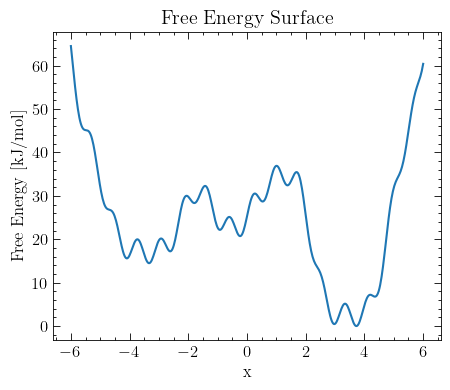

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

# Import the MFI library 
import MFI_lib1D as lib1
import MFI_class1D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

if 'path_data' not in globals():
    if not os.path.isdir("_data_temp/convergence_analysis/"): print("\nThe data folder \"_data_temp/convergence_analysis/\" does not exist. Creating new folder."); os.mkdir(path_notebook + "/_data_temp/convergence_analysis/"); 
    path_data = path_notebook + "/_data_temp/convergence_analysis/"
print("The data folder is:", path_data)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})


# Load the grid, the FES, and the PLUMED grid. Change n_surf to select the surface.  
for _surf_parameters_ in [0]:
    [grid, y_list, y_string_list] = lib1.load_pkl(path_notebook + "/fes_list_1D")
    FES_cutoff_list = [30, 40, 40, 50, 50, 80, 60, 70, 70, 80, 80, 90, 80, 90, 90, 100, 100, 100, 110, 110]
    n_surf = 4
    y = y_list[n_surf]
    FES_cutoff = FES_cutoff_list[n_surf]
    y_string = y_string_list[n_surf]  
    plumed_dat_text = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x FUNC=({y_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
    dx, dy = grid[1] - grid[0], np.gradient(y, grid[1] - grid[0]) 
    [pl_x, pl_min, pl_max, pl_n, pl_ext] = lib1.get_plumed_grid_1D(grid, -7, 7, print_info=True)
    plt.figure(figsize=(5,4)); plt.plot(grid, y); plt.xlabel("x"); plt.ylabel("Free Energy [kJ/mol]"); plt.title("Free Energy Surface"); plt.show()

#### Define default parameters

In [12]:
os.chdir(path_notebook); reload(MFI_class1D); reload(lib1); pass

In [2]:
default_params = {	"grid":grid, "y":y, "bw":dx*1.5, "periodic":False, "dy":dy, # "initial_position":[0,0], 
					"System":"Langevin", "plumed_dat_text":plumed_dat_text, "pl_grid":pl_x, "simulation_steps": 1_000_000, 
					"position_pace":50, "metad_pace":500, "n_pos_per_window":10, 
     				"metad_width":0.1, "metad_height":5, "biasfactor":50 , 
         			"Bias_sf":1.05, "gaus_filter_sigma":1, 
                    "len_error_list":200, 
					"FES_cutoff":FES_cutoff, "calculate_FES_st_dev":True, "bootstrap_iter":50,
     				"simulation_folder_path": path_data, "print_info": True}

## Run Simulations in the 1st Stage - Exploration Stage

### Run 1st simulation

| 100% | AAD: 2.18 [kJ/mol] | Total time: 1 sec                                                            


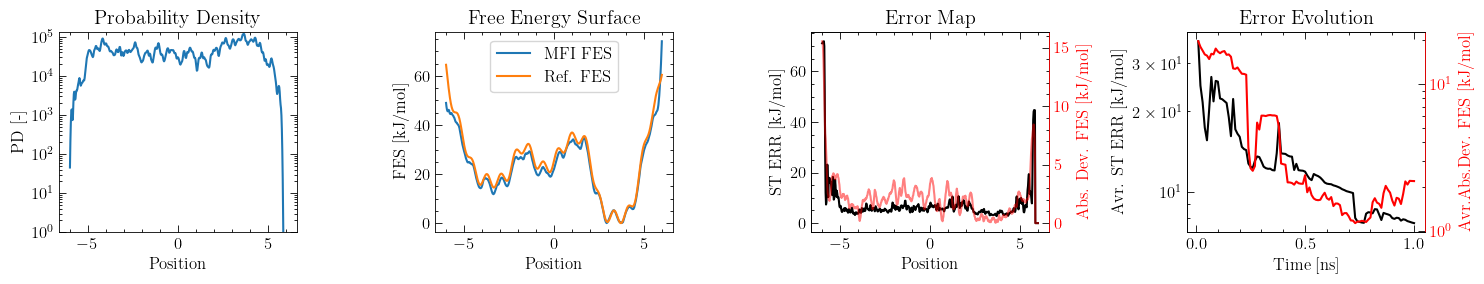

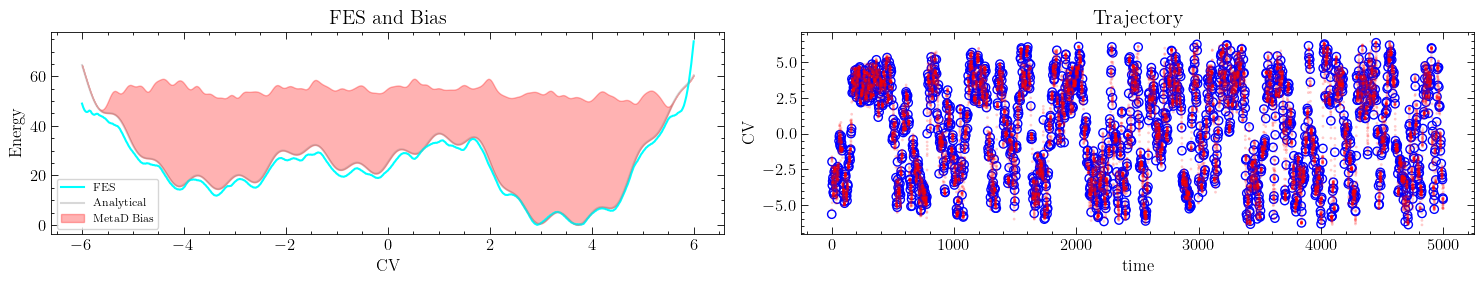

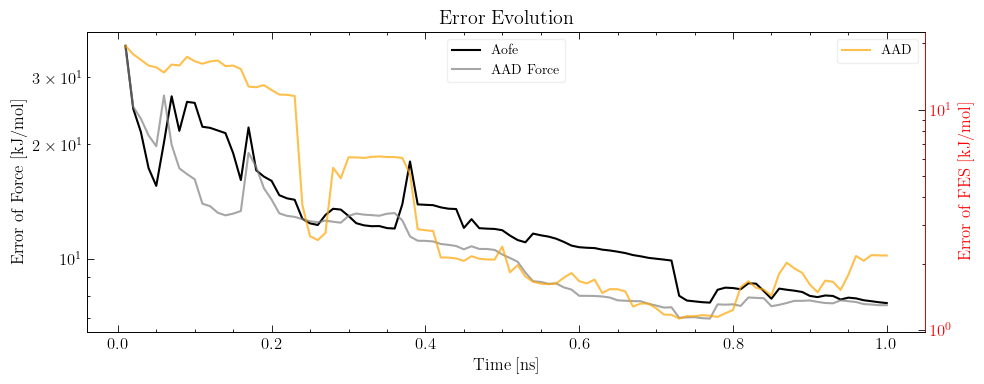

In [5]:
new_params = {**default_params}
new_params.update({"ID":"_1", "metad_height":5, "biasfactor":50})

new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":None, "n_pos":20_000 // 5})

## Load MFI object
MFI = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI.run_simulation()

## Analyse the data
MFI.analyse_data()

## Plot the results and save the data for later use
MFI.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI.grid, fes=MFI.FES, metad_bias=MFI.Bias, position=MFI.position, hills=MFI.hills, y=MFI.y )
MFI.plot_errors()


| 100% | AAD: 0.419 [kJ/mol] | Total time: 1.0 min : 5 sec                                                            


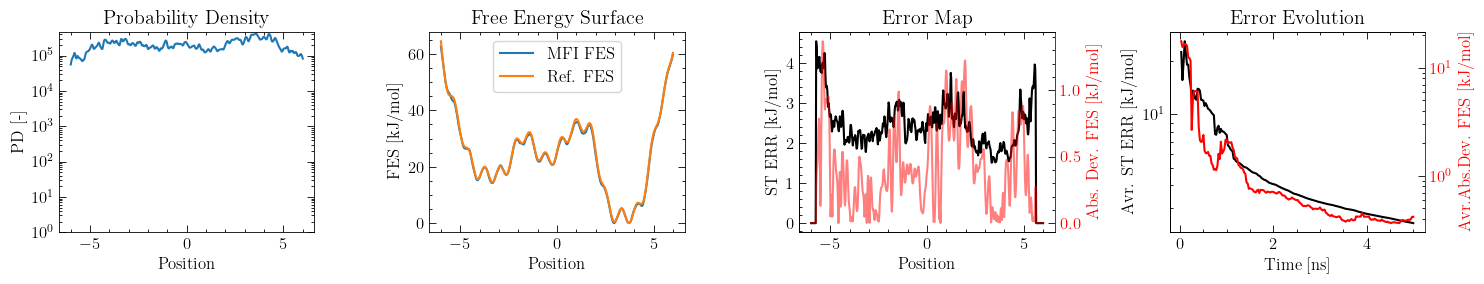

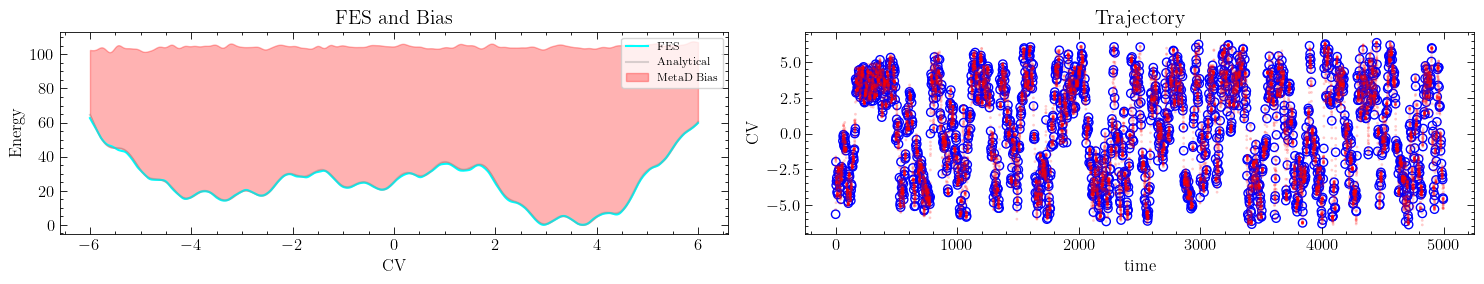

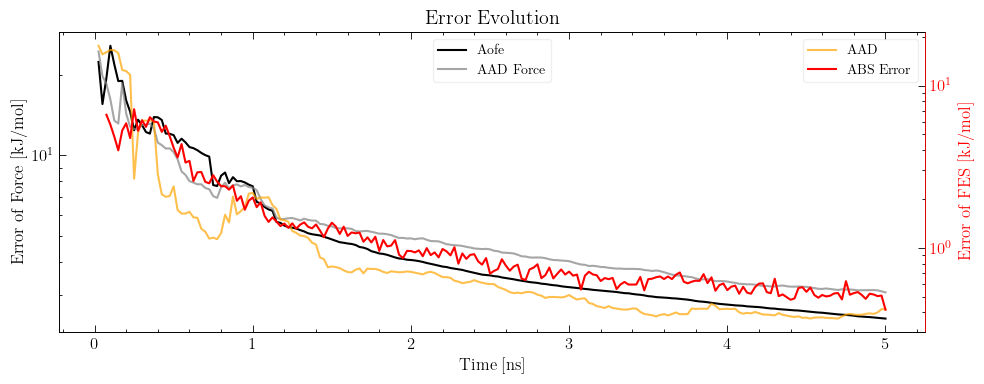

In [4]:
new_params = {**default_params}
new_params.update({"ID":"_1", "metad_height":5, "biasfactor":50})

new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":50})#, "n_pos":20_000 // 5})

## Load MFI object
MFI = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI.run_simulation()

## Analyse the data
MFI.analyse_data()

## Plot the results and save the data for later use
MFI.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI.grid, fes=MFI.FES, metad_bias=MFI.Bias, position=MFI.position, hills=MFI.hills, y=MFI.y )
MFI.plot_errors()

### Run 2nd simulation

| 100% | AAD: 4.219 [kJ/mol] | Total time: 1 sec                                                            


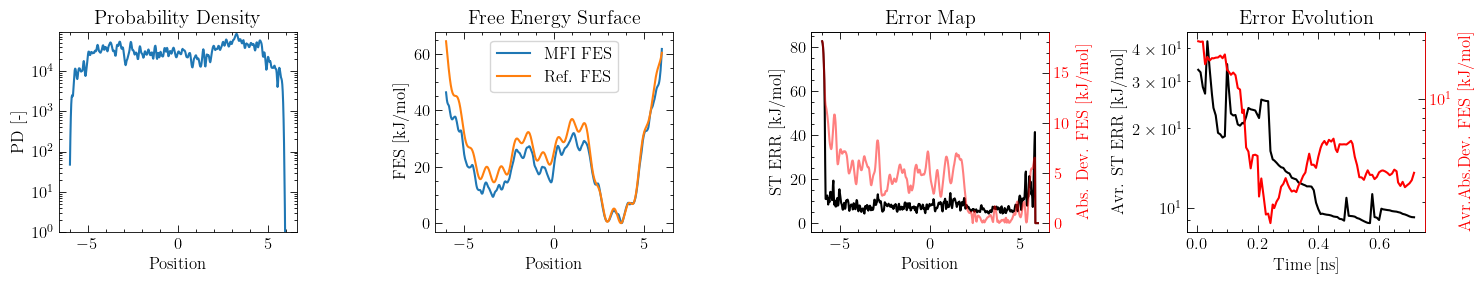

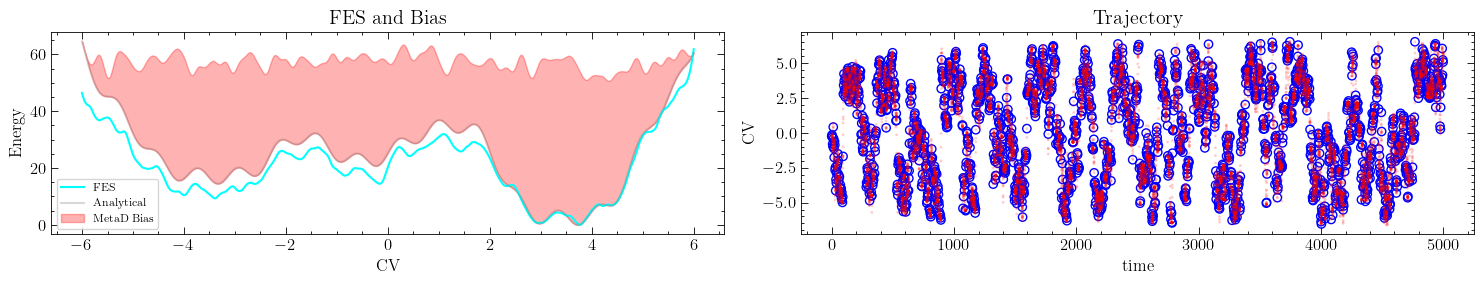

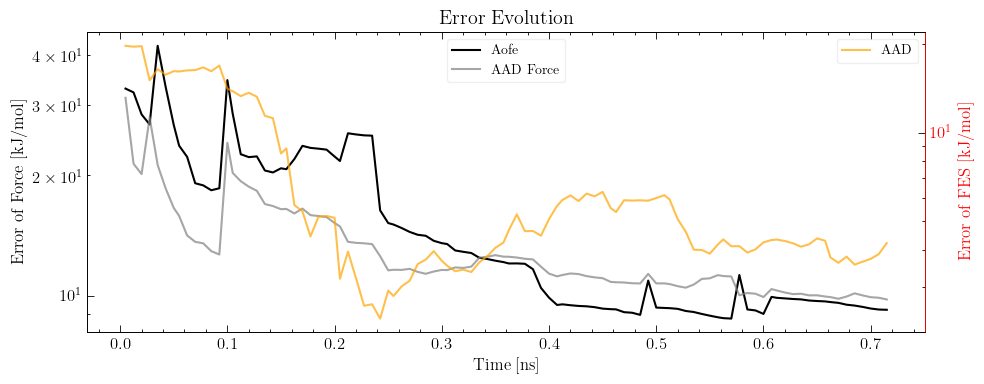

In [6]:
new_params = {**default_params}
new_params.update({"ID":"_2", "metad_height":7, "biasfactor":70})

new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":None, "n_pos":20_000 // 7})

## Load MFI object
MFI2 = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI2.run_simulation()

## Analyse the data
MFI2.analyse_data()

## Plot the results and save the data for later use
MFI2.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI2.grid, fes=MFI2.FES, metad_bias=MFI2.Bias, position=MFI2.position, hills=MFI2.hills, y=MFI2.y )
MFI2.plot_errors()

| 100% | AAD: 0.551 [kJ/mol] | Total time: 8 sec                                                            


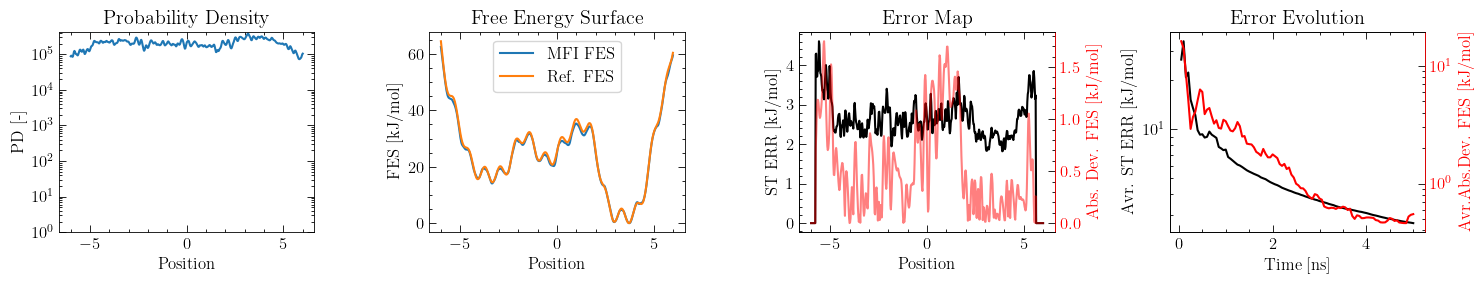

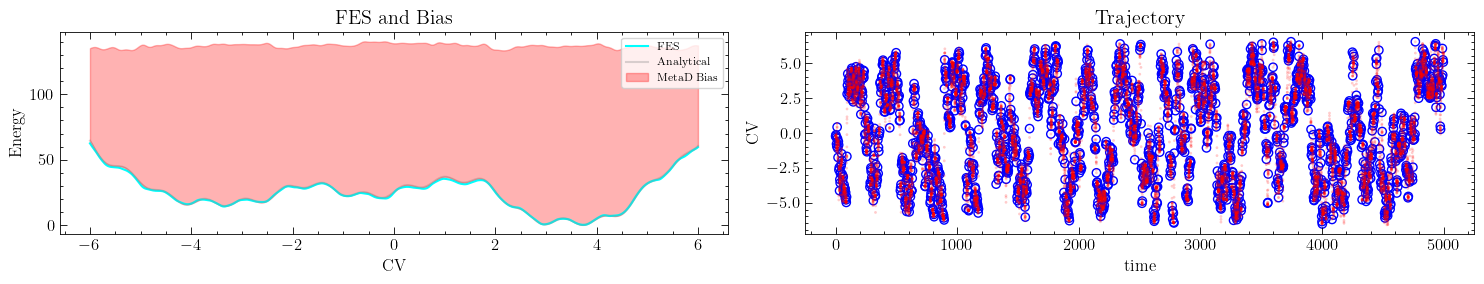

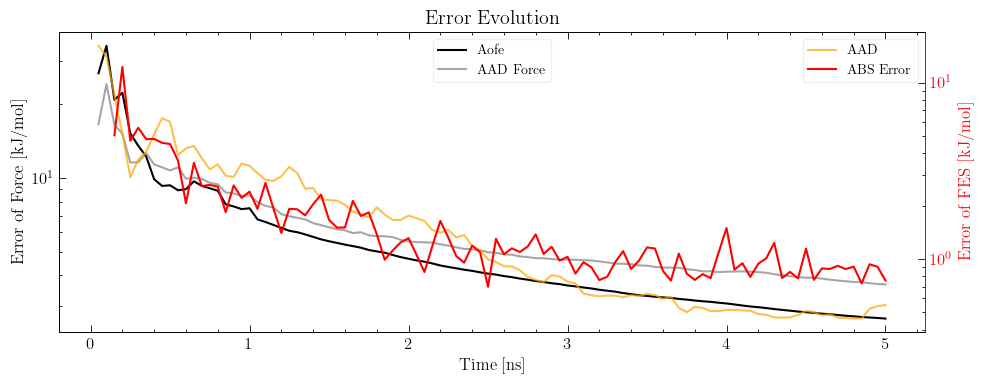

In [7]:
new_params = {**default_params}
new_params.update({"ID":"_2", "metad_height":7, "biasfactor":70})

new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":10})#, "n_pos":20_000 // 7})

## Load MFI object
MFI2 = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI2.run_simulation()

## Analyse the data
MFI2.analyse_data()

## Plot the results and save the data for later use
MFI2.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI2.grid, fes=MFI2.FES, metad_bias=MFI2.Bias, position=MFI2.position, hills=MFI2.hills, y=MFI2.y )
MFI2.plot_errors()

### Run 3rd simulation

|*                                                 | 1% | AAD: 14.864 [kJ/mol] | Time left: 0 sec

| 100% | AAD: 3.565 [kJ/mol] | Total time: 1 sec                                                            


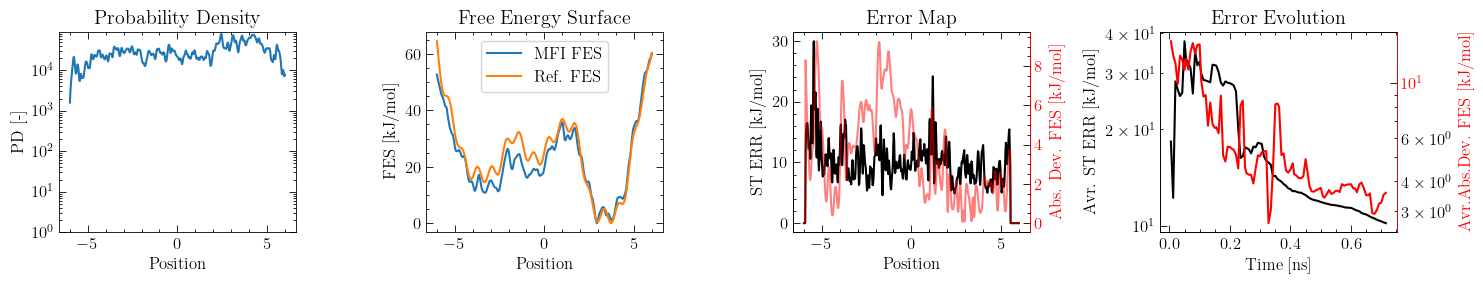

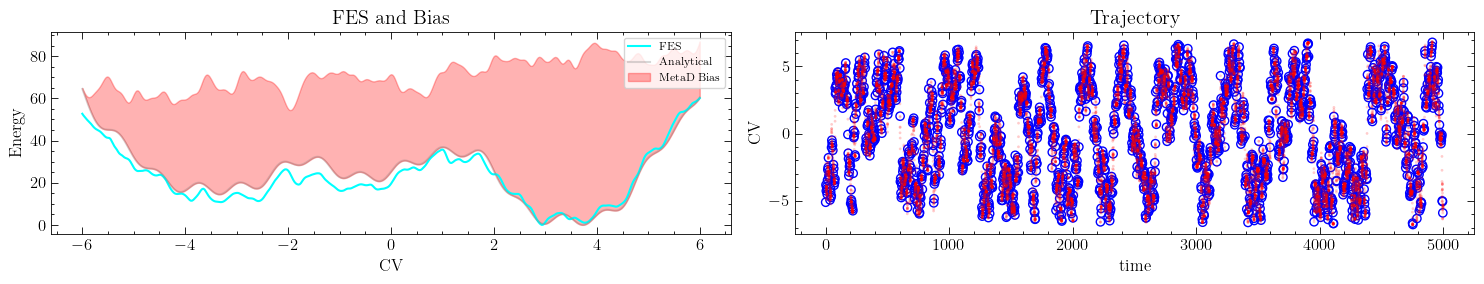

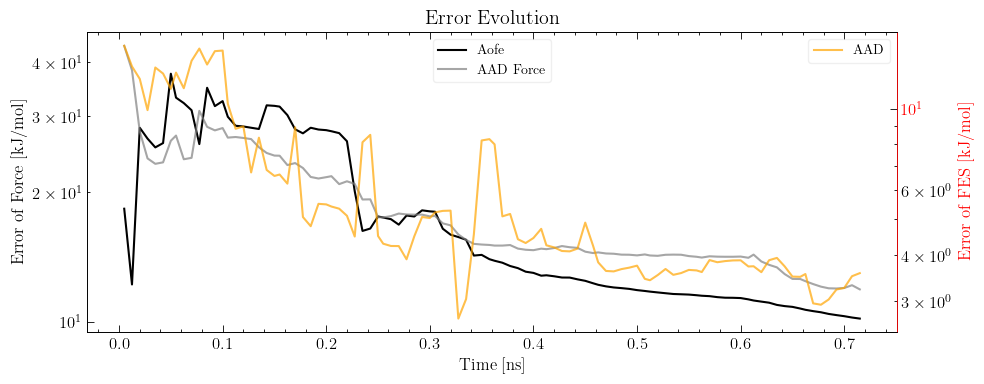

In [8]:
new_params = {**default_params}
new_params.update({"ID":"_3", "metad_height":10, "biasfactor":100})

new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":None, "n_pos":20_000 // 7})

## Load MFI object
MFI3 = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI3.run_simulation()

## Analyse the data
MFI3.analyse_data()

## Plot the results and save the data for later use
MFI3.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI3.grid, fes=MFI3.FES, metad_bias=MFI3.Bias, position=MFI3.position, hills=MFI3.hills, y=MFI3.y )
MFI3.plot_errors()

| 100% | AAD: 0.498 [kJ/mol] | Total time: 1.0 min : 4 sec                                                            


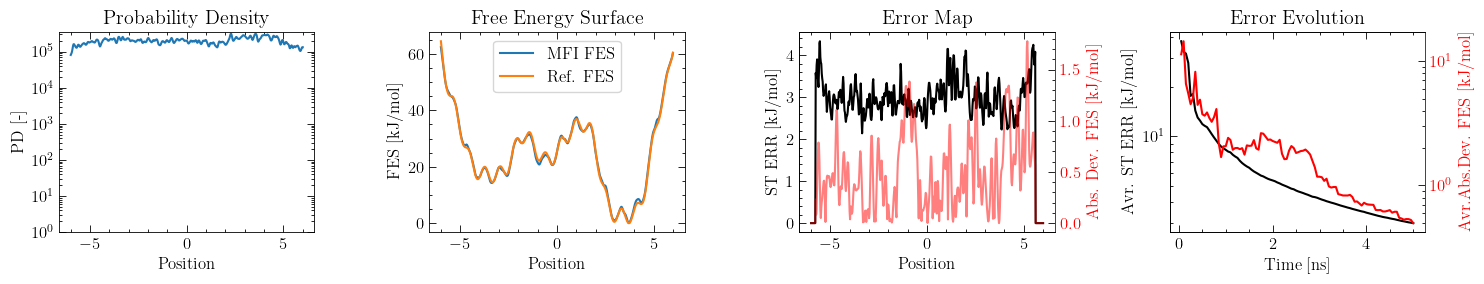

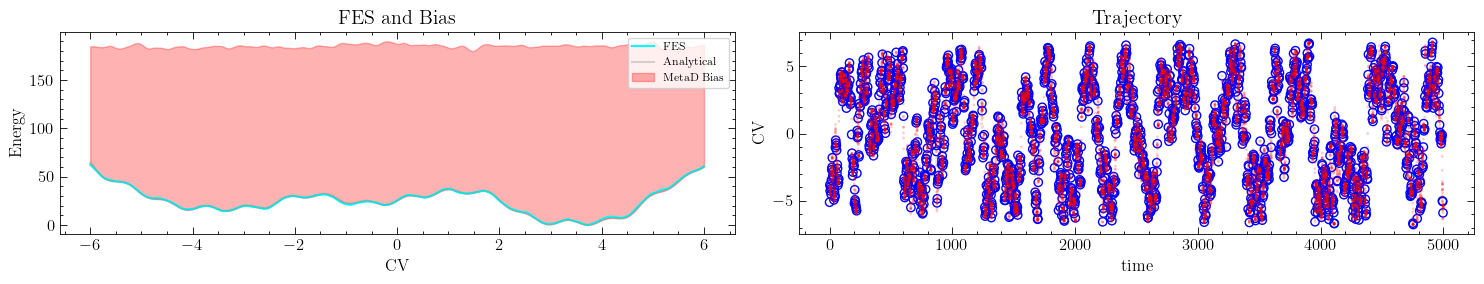

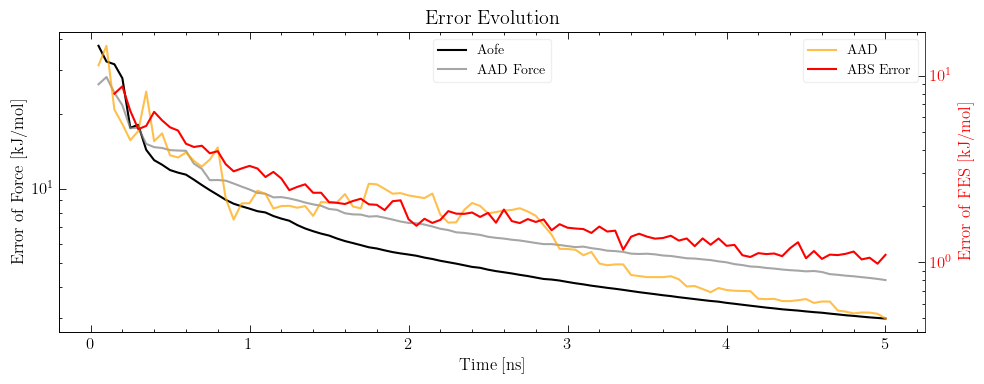

In [9]:
new_params = {**default_params}
new_params.update({"ID":"_3", "metad_height":10, "biasfactor":100})

new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":20_000 // 7})

## Load MFI object
MFI3 = MFI_class1D.MFI1D(**new_params)

## Run the simulation
# MFI3.run_simulation()

## Analyse the data
MFI3.analyse_data()

## Plot the results and save the data for later use
MFI3.plot_results()
lib1.plot_FES_Bias_and_Traj(grid=MFI3.grid, fes=MFI3.FES, metad_bias=MFI3.Bias, position=MFI3.position, hills=MFI3.hills, y=MFI3.y )
MFI3.plot_errors()

## Run Simulations in the 2nd Stage - MetaD Stage

In [17]:
os.chdir(path_notebook); reload(MFI_class1D); reload(lib1); pass

| 100% | AAD: 2.18 [kJ/mol] | Total time: 1 sec                                                            


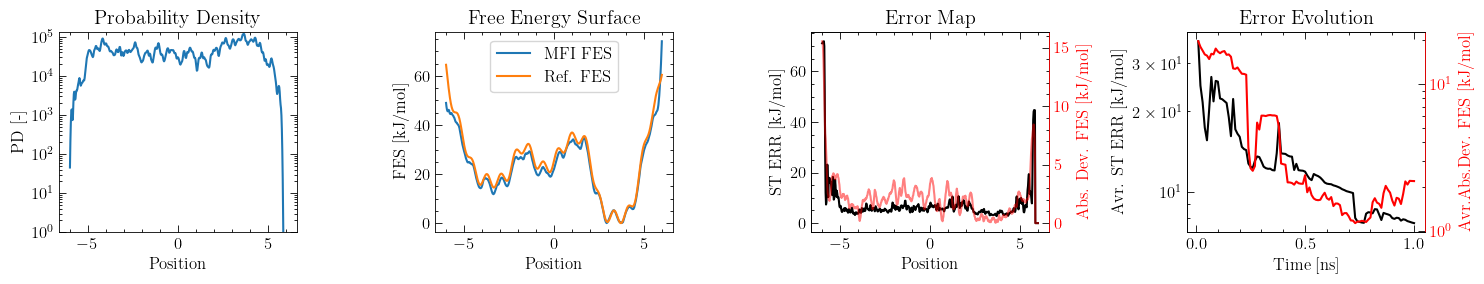

In [10]:
new_params = {**default_params}
new_params.update({"ID":"_1", "metad_height":5, "biasfactor":50})
new_params.update({"len_error_list":100, "n_pos":20_000 // 5, "record_forces_e":True, "calculate_FES_st_dev":False, "bootstrap_iter":None})

## Load MFI object
MFI_1 = MFI_class1D.MFI1D(**new_params)

## Analyse the data
MFI_1.analyse_data()

MetaD_force_terms = MFI_1.force_terms

# ## Plot the results and save the data for later use
MFI_1.plot_results()
t1, aofe1, aad1 = np.array(MFI_1.Avr_Error_list)[:,0], np.array(MFI_1.Avr_Error_list)[:,2], np.array(MFI_1.Avr_Error_list)[:,MFI_1.aad_index]

### 1st simulation in MetaD stage

| 100% | AAD: 0.572 [kJ/mol] | Total time: 1.0 min : 5 sec                                                            


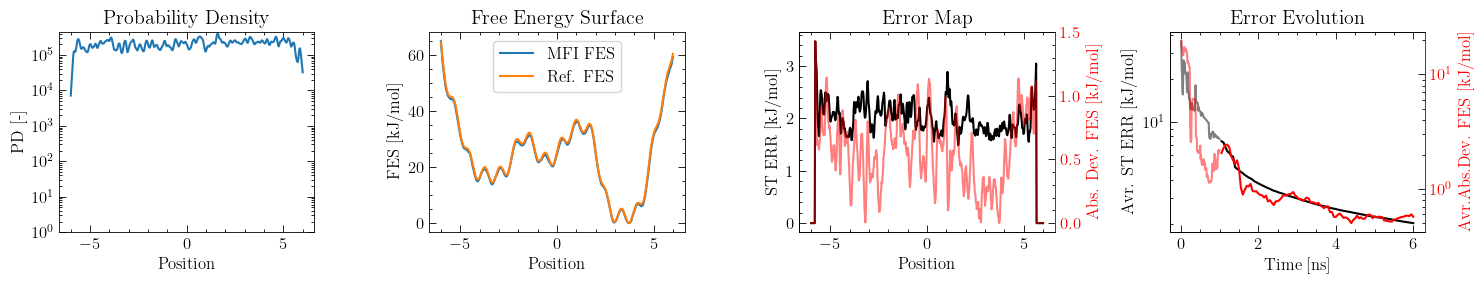

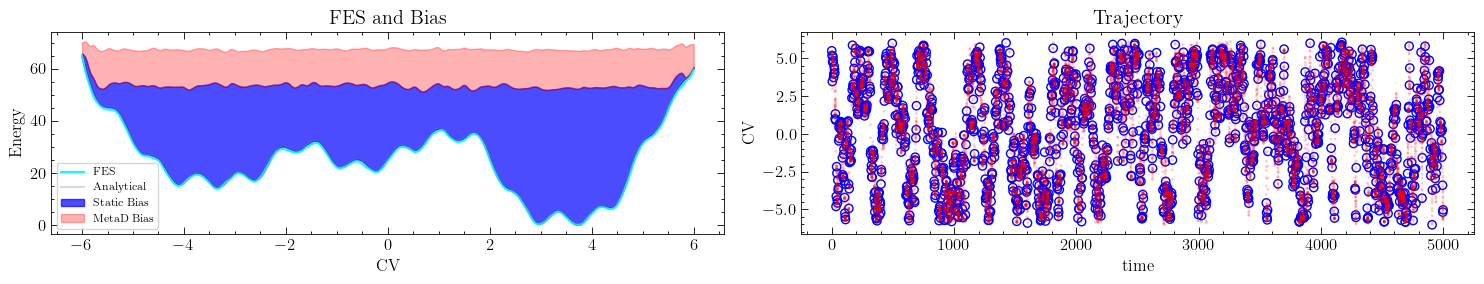

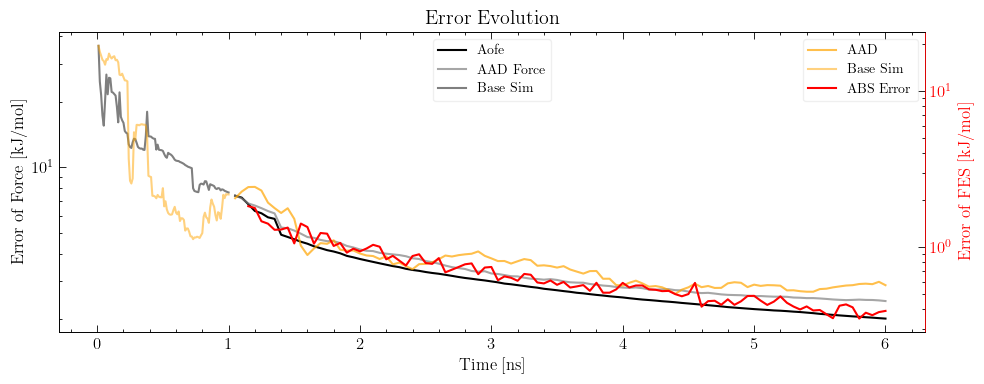

In [11]:
new_params = {**default_params}
new_params.update({"ID":"_2_1", "metad_height":3, "biasfactor":5})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":MFI_1.force_terms, "base_time":MFI_1.sim_time, "base_forces_e_list":MFI_1.forces_e_list})


## Load MFI object
MFI_2_1 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_2_1.make_external_bias(MFI_1.FES)

## Run the simulation
# MFI_2_1.run_simulation()

## Analyse the data
MFI_2_1.analyse_data()

## Plot the results and save the data for later use
MFI_2_1.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])
lib1.plot_FES_Bias_and_Traj(grid=MFI_2_1.grid, fes=MFI_2_1.FES, metad_bias=MFI_2_1.Bias, static_bias=MFI_2_1.Bias_static, position=MFI_2_1.position, hills=MFI_2_1.hills, y=MFI_2_1.y )
MFI_2_1.plot_errors(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])

t2, aofe2, aad2 = np.array(MFI_2_1.Avr_Error_list)[:,0], np.array(MFI_2_1.Avr_Error_list)[:,2], np.array(MFI_2_1.Avr_Error_list)[:,MFI_2_1.aad_index]


### 2nd simulation in MetaD stage

| 100% | AAD: 0.448 [kJ/mol] | Total time: 1.0 min : 5 sec                                                            


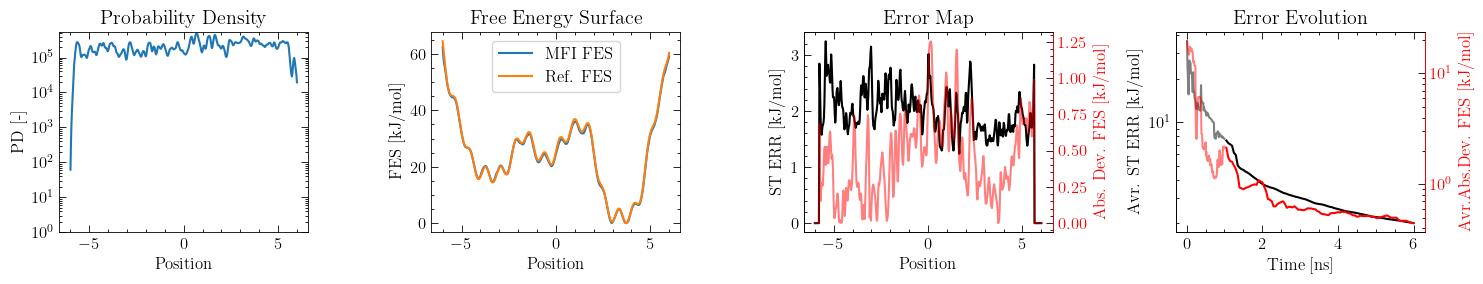

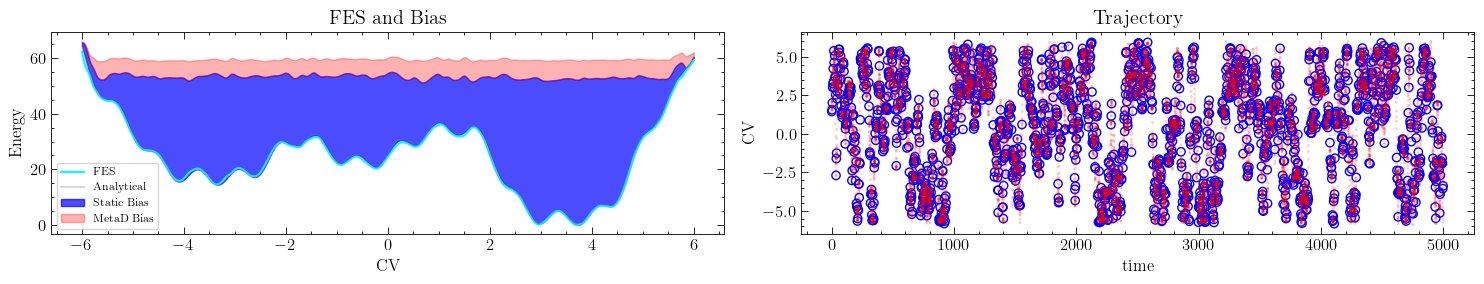

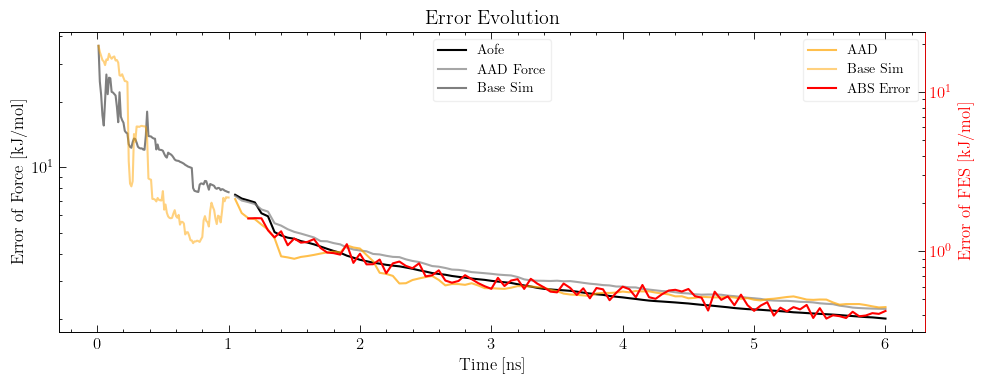

In [12]:
new_params = {**default_params}
new_params.update({"ID":"_2_2", "metad_height":1, "biasfactor":3})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":MFI_1.force_terms, "base_time":MFI_1.sim_time, "base_forces_e_list":MFI_1.forces_e_list})


## Load MFI object
MFI_2_2 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_2_2.make_external_bias(MFI_1.FES)

## Run the simulation
# MFI_2_2.run_simulation()

## Analyse the data
MFI_2_2.analyse_data()

## Plot the results and save the data for later use
MFI_2_2.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])
lib1.plot_FES_Bias_and_Traj(grid=MFI_2_2.grid, fes=MFI_2_2.FES, metad_bias=MFI_2_2.Bias, static_bias=MFI_2_2.Bias_static, position=MFI_2_2.position, hills=MFI_2_2.hills, y=MFI_2_2.y )
MFI_2_2.plot_errors(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])


### 3rd simulation in MetaD stage

| 100% | AAD: 0.328 [kJ/mol] | Total time: 1.0 min : 6 sec                                                            


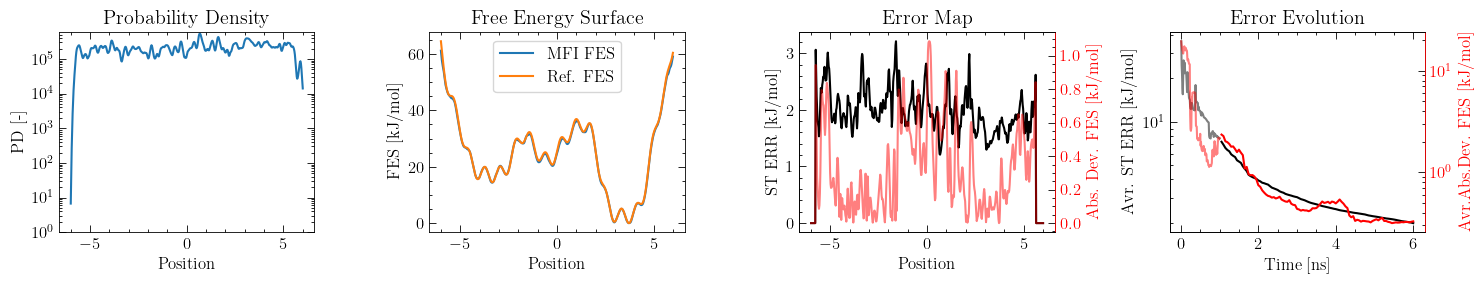

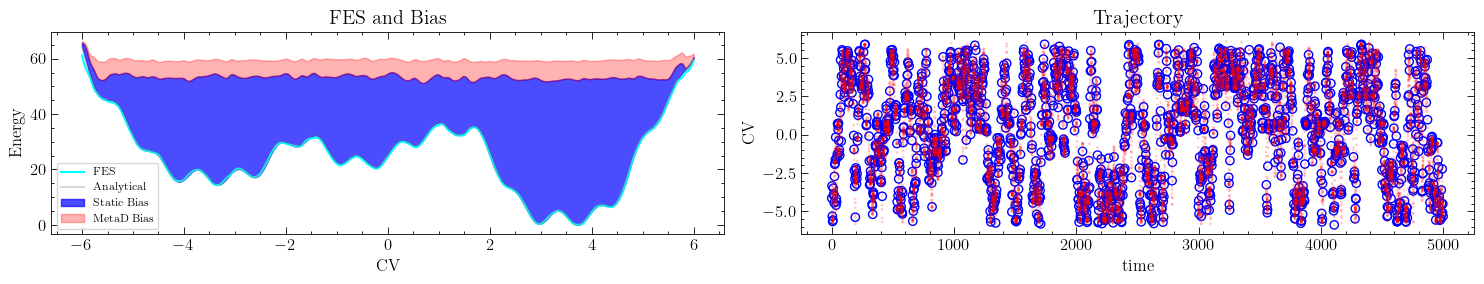

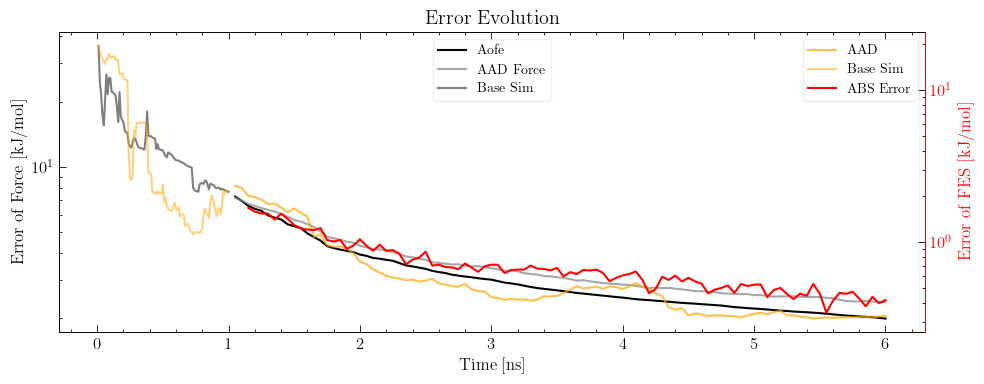

In [13]:
new_params = {**default_params}
new_params.update({"ID":"_2_3", "metad_height":1, "biasfactor":3})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":MFI_1.force_terms, "base_time":MFI_1.sim_time, "base_forces_e_list":MFI_1.forces_e_list})

## Load MFI object
MFI_2_3 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_2_3.make_external_bias(MFI_1.FES)

## Run the simulation
# MFI_2_3.run_simulation()

## Analyse the data
MFI_2_3.analyse_data()

## Plot the results and save the data for later use
MFI_2_3.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])
lib1.plot_FES_Bias_and_Traj(grid=MFI_2_3.grid, fes=MFI_2_3.FES, metad_bias=MFI_2_3.Bias, static_bias=MFI_2_3.Bias_static, position=MFI_2_3.position, hills=MFI_2_3.hills, y=MFI_2_3.y )
MFI_2_3.plot_errors(more_aofe=[t1, aofe1] , more_aad = [t1, aad1])


## Run Simulations in the 3rd Stage - Flat Stage

### 1st simulation in Flat stage

| 100% | AAD: 0.258 [kJ/mol] | Total time: 1.0 min : 8 sec                                                            


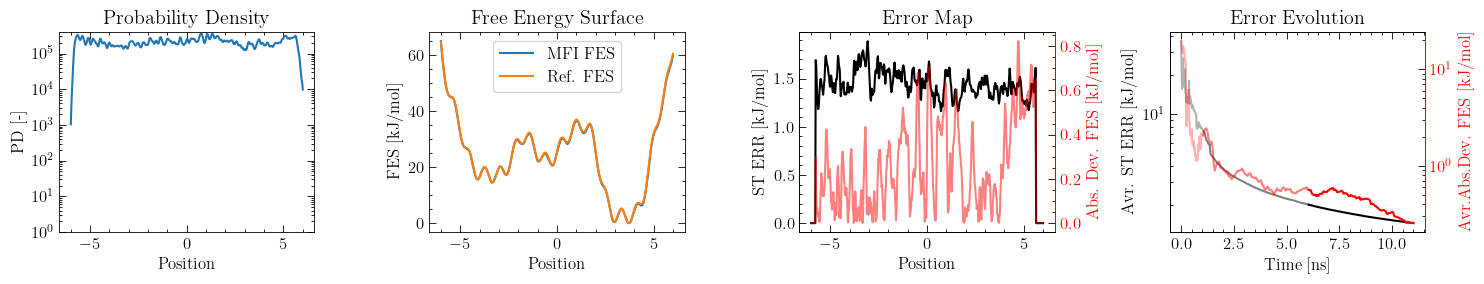

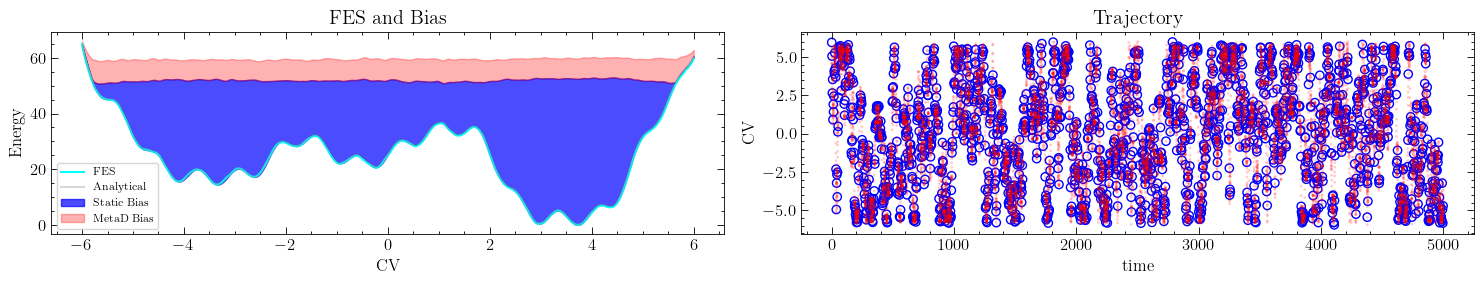

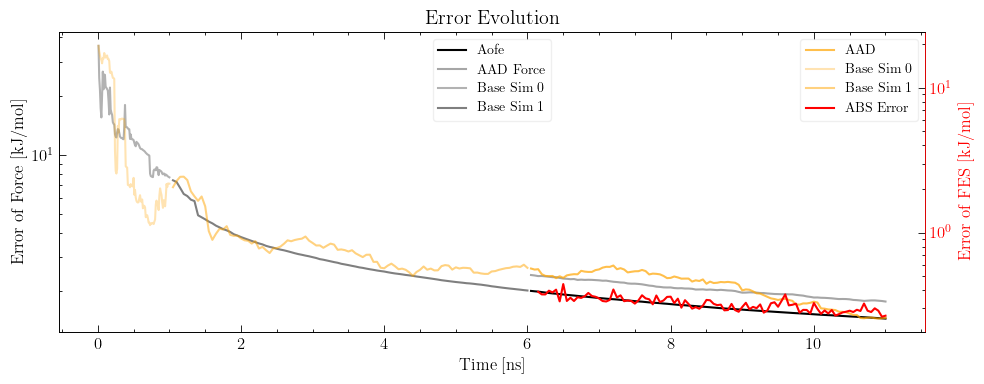

In [18]:
new_params = {**default_params}
new_params.update({"ID":"_3_1", "metad_height":2, "biasfactor":3})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":lib1.patch_forces([MFI_1.force_terms, MFI_2_1.force_terms]), "base_time":MFI_1.sim_time + MFI_2_1.sim_time, "base_forces_e_list":np.concatenate((MFI_1.forces_e_list, MFI_2_1.forces_e_list), axis=0)})


## Load MFI object
MFI_3_1 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_3_1.make_external_bias(MFI_2_1.FES)

## Run the simulation
# MFI_3_1.run_simulation()

## Analyse the data
MFI_3_1.analyse_data()

## Plot the results and save the data for later use
MFI_3_1.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
lib1.plot_FES_Bias_and_Traj(grid=MFI_3_1.grid, fes=MFI_3_1.FES, metad_bias=MFI_3_1.Bias, static_bias=MFI_3_1.Bias_static, position=MFI_3_1.position, hills=MFI_3_1.hills, y=MFI_3_1.y )
MFI_3_1.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])


### 2nd simulation in Flat stage

| 100% | AAD: 0.352 [kJ/mol] | Total time: 1.0 min : 3 sec                                                            


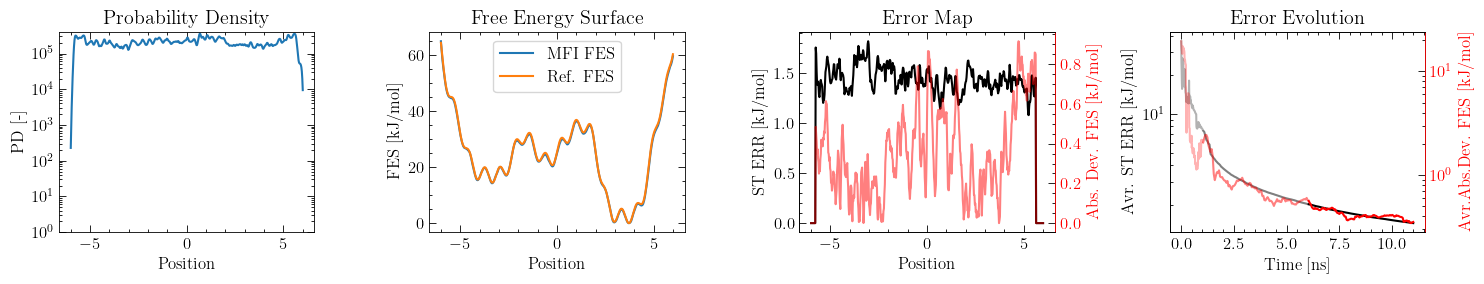

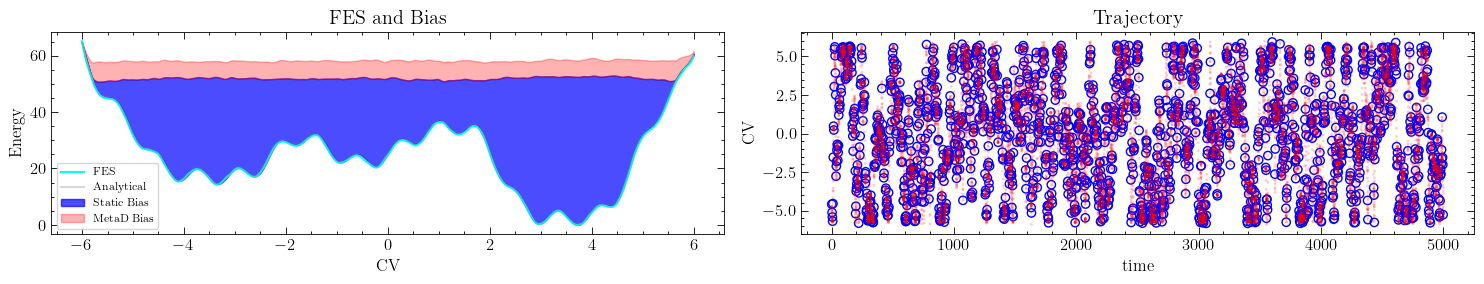

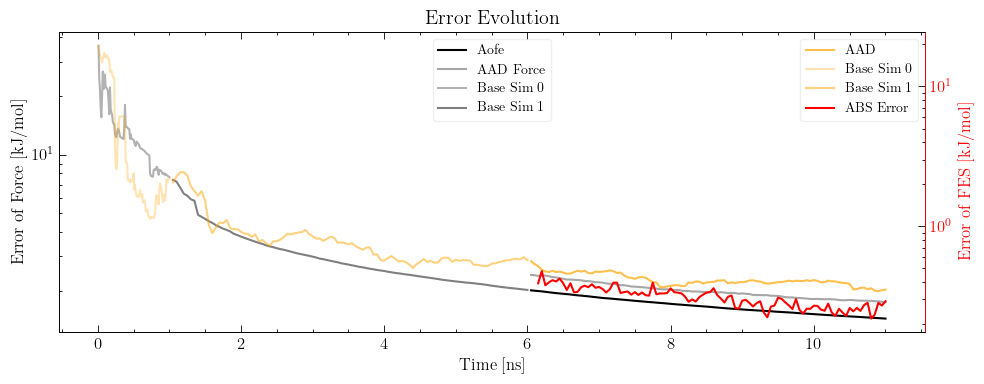

In [19]:
new_params = {**default_params}
new_params.update({"ID":"_3_2", "metad_height":1, "biasfactor":3})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":lib1.patch_forces([MFI_1.force_terms, MFI_2_1.force_terms]), "base_time":MFI_1.sim_time + MFI_2_1.sim_time, "base_forces_e_list":np.concatenate((MFI_1.forces_e_list, MFI_2_1.forces_e_list), axis=0)})


## Load MFI object
MFI_3_2 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_3_2.make_external_bias(MFI_2_1.FES)

## Run the simulation
# MFI_3_2.run_simulation()

## Analyse the data
MFI_3_2.analyse_data()

## Plot the results and save the data for later use
MFI_3_2.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
lib1.plot_FES_Bias_and_Traj(grid=MFI_3_2.grid, fes=MFI_3_2.FES, metad_bias=MFI_3_2.Bias, static_bias=MFI_3_2.Bias_static, position=MFI_3_2.position, hills=MFI_3_2.hills, y=MFI_3_2.y )
MFI_3_2.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])


### 3rd simulation in Flat stage

In [43]:
os.chdir(path_notebook); reload(MFI_class1D); reload(lib1); pass

| 100% | AAD: 0.329 [kJ/mol] | Total time: 1.0 min : 6 sec                                                            


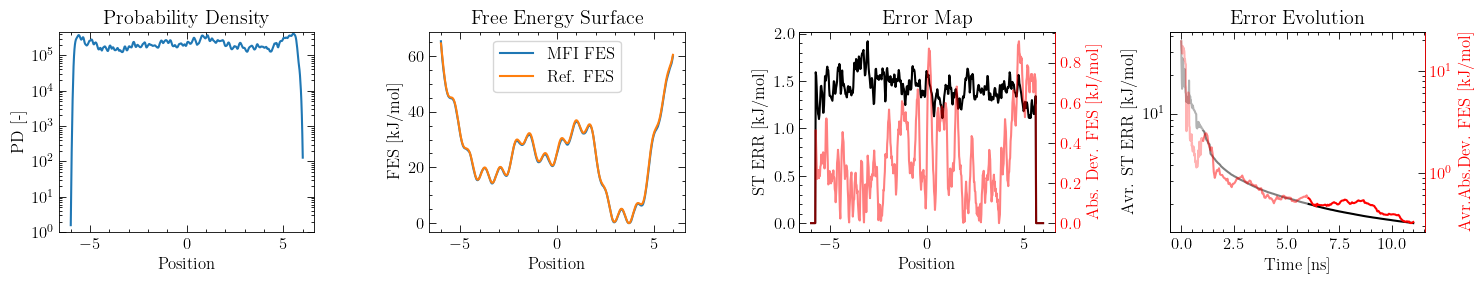

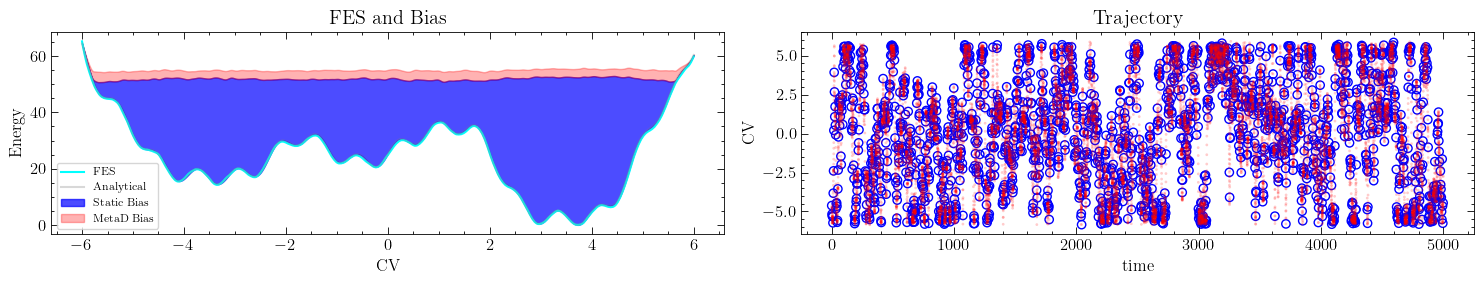

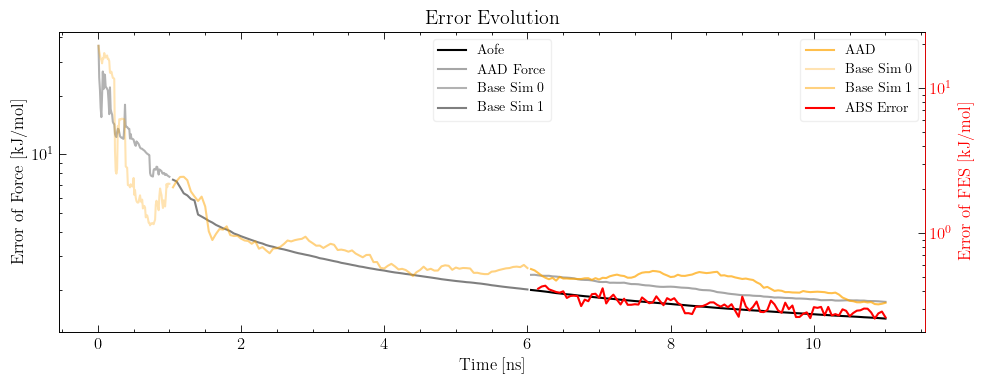

In [20]:
new_params = {**default_params}
new_params.update({"ID":"_3_3", "metad_height":0.5, "biasfactor":2})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":lib1.patch_forces([MFI_1.force_terms, MFI_2_1.force_terms]), "base_time":MFI_1.sim_time + MFI_2_1.sim_time, "base_forces_e_list":np.concatenate((MFI_1.forces_e_list, MFI_2_1.forces_e_list), axis=0)})


## Load MFI object
MFI_3_3 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_3_3.make_external_bias(MFI_2_1.FES)

## Run the simulation
# MFI_3_3.run_simulation()

## Analyse the data
MFI_3_3.analyse_data()

## Plot the results and save the data for later use
MFI_3_3.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
lib1.plot_FES_Bias_and_Traj(grid=MFI_3_3.grid, fes=MFI_3_3.FES, metad_bias=MFI_3_3.Bias, static_bias=MFI_3_3.Bias_static, position=MFI_3_3.position, hills=MFI_3_3.hills, y=MFI_3_3.y )
MFI_3_3.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])


| 100% | AAD: 0.329 [kJ/mol] | Total time: 59 sec                                                            


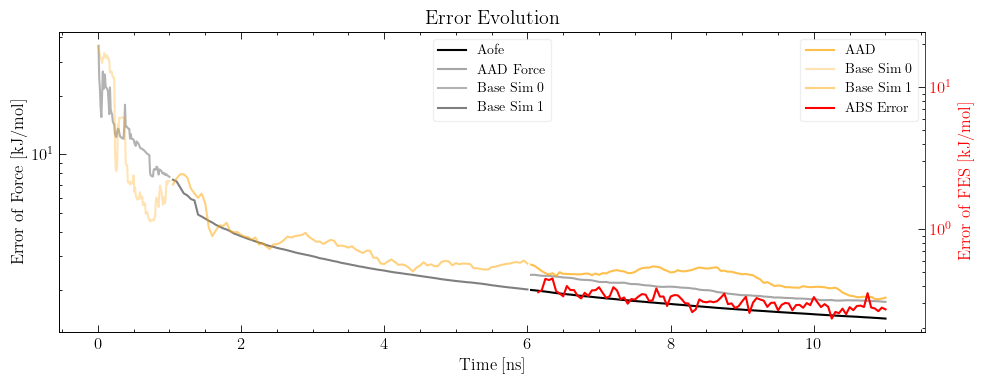

In [21]:
new_params = {**default_params}
new_params.update({"ID":"_3_3", "metad_height":0.5, "biasfactor":2})
new_params.update({"len_error_list":100, "calculate_FES_st_dev":False, "bootstrap_iter":100})#, "n_pos":20_000 // 5})
new_params.update({"base_forces":lib1.patch_forces([MFI_1.force_terms, MFI_2_1.force_terms]), "base_time":MFI_1.sim_time + MFI_2_1.sim_time, "base_forces_e_list":np.concatenate((MFI_1.forces_e_list, MFI_2_1.forces_e_list), axis=0)})


## Load MFI object
MFI_3_3 = MFI_class1D.MFI1D(**new_params)

## Make the external bias
MFI_3_3.make_external_bias(MFI_2_1.FES)

## Run the simulation
# MFI_3_3.run_simulation()

## Analyse the data
MFI_3_3.analyse_data()

## Plot the results and save the data for later use
# MFI_3_3.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])
# lib1.plot_FES_Bias_and_Traj(grid=MFI_3_3.grid, fes=MFI_3_3.FES, metad_bias=MFI_3_3.Bias, static_bias=MFI_3_3.Bias_static, position=MFI_3_3.position, hills=MFI_3_3.hills, y=MFI_3_3.y )
MFI_3_3.plot_errors(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]])


aofe1.shape: (100,)
aofe2.shape: (100,)
aofe3.shape: (100,)


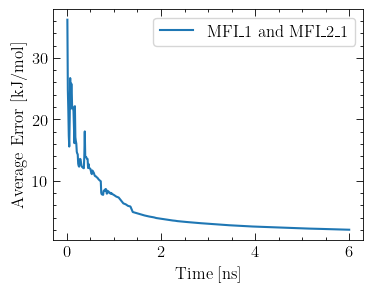

In [34]:
print("aofe1.shape:", aofe1.shape)
print("aofe2.shape:", aofe2.shape)

t3 = MFI_3_3.Avr_Error_list[:,0]
aofe3 = MFI_3_3.Avr_Error_list[:,2]
print("aofe3.shape:", aofe3.shape)

t12 = np.concatenate((t1, t2), axis=0)  
aofe12 = np.concatenate((aofe1, aofe2), axis=0)
t123 = np.concatenate((t12, t3), axis=0)
aofe123 = np.concatenate((aofe12, aofe3), axis=0)

plt.plot(t12, aofe12, label="MFI_1 and MFI_2_1")

plt.xlabel("Time [ns]"); plt.ylabel("Average Error [kJ/mol]"); plt.legend(); plt.show()


In [94]:
print(max(aofe1))
print(np.min(aofe1))
print(np.min(aofe2))
print(np.min(aofe3))

36.19594667817582
7.670195324419516
2.0192167136804655
1.4299939574210112


min(aofe12)=2.019, min(aofe3)=1.430
Fitted parameters for aofe1: A = 22374.423, B = 0.000, C = -22366.610
Fitted parameters for aofe2: A = 6.004, B = 1.539, C = 1.767
Fitted parameters for aofe3: A = 7.422, B = 0.966, C = 0.702


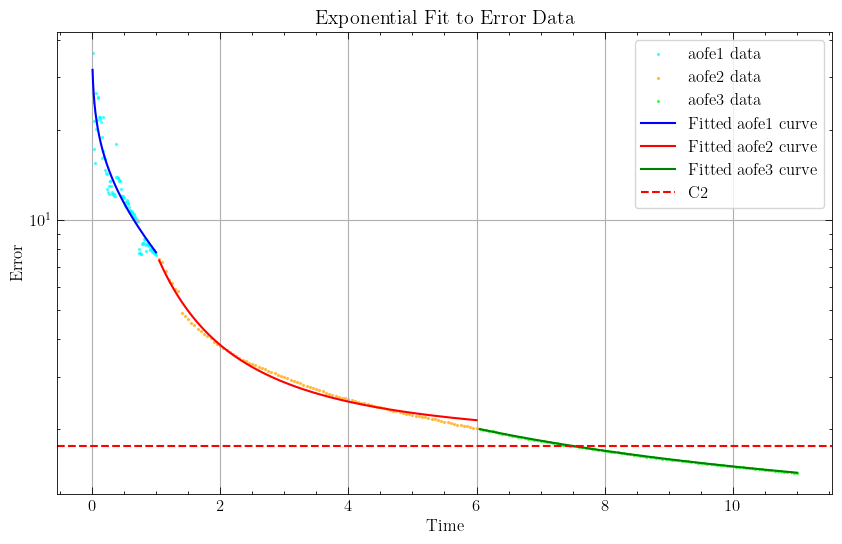

In [102]:
from scipy.optimize import curve_fit

# Define the exponential decay function
# def exp_func(t, A, B, C): return A * np.exp(-B * t) + C
def exp_func(t, A, B, C): return A * t**(-B) + C

p1 = (np.max(aofe1), 1, 1)
p2 = (max(aofe2), 1, np.min(aofe2))
p3 = (max(aofe3), 1, np.min(aofe3))

bounds1 = ([0, 0, -10000000], [np.inf, np.inf, np.min(aofe12)])
bounds2 = ([0, 0, 0], [np.inf, np.inf, np.min(aofe12)])
bounds3 = ([0, 0, 0], [np.inf, np.inf, np.min(aofe3)])
print(f"{min(aofe12)=:.3f}, {min(aofe3)=:.3f}")

# # Fit exponential function to aofe12 data
# popt_12, pcov_12 = curve_fit(exp_func, t12, aofe12, p0=(1, 0.1, 0))  # Initial guesses for A, B, C
# A12, B12, C12 = popt_12

popt_1, pcov_1 = curve_fit(exp_func, t1, aofe1, p0=p1, bounds=bounds1, maxfev=10000)  # Initial guesses for A, B, C
A1, B1, C1 = popt_1

popt_2, pcov_2 = curve_fit(exp_func, t2, aofe2, p0=p2, bounds=bounds2, maxfev=10000)  # Initial guesses for A, B, C
A2, B2, C2 = popt_2

# Fit exponential function to aofe3 data
popt_3, pcov_3 = curve_fit(exp_func, t3, aofe3, p0=p3, bounds=bounds3, maxfev=10000)  # Initial guesses for A, B, C
A3, B3, C3 = popt_3

# Print fitted parameters
# print(f"Fitted parameters for aofe12: A = {A12:.3f}, B = {B12:.3f}, C = {C12:.3f}")
print(f"Fitted parameters for aofe1: A = {A1:.3f}, B = {B1:.3f}, C = {C1:.3f}")
print(f"Fitted parameters for aofe2: A = {A2:.3f}, B = {B2:.3f}, C = {C2:.3f}")
print(f"Fitted parameters for aofe3: A = {A3:.3f}, B = {B3:.3f}, C = {C3:.3f}")

# Generate smooth curves for plotting
# t12_smooth = np.linspace(min(t12), max(t12), 500)
t1_smooth = np.linspace(min(t1), max(t1), 500)
t2_smooth = np.linspace(min(t2), max(t2), 500)
t3_smooth = np.linspace(min(t3), max(t3), 500)

# fit_12 = exp_func(t12_smooth, *popt_12)
fit_1 = exp_func(t1_smooth, *popt_1)
fit_2 = exp_func(t2_smooth, *popt_2)
fit_3 = exp_func(t3_smooth, *popt_3)

# Plot the results
plt.figure(figsize=(10, 6))

# Original data
# plt.scatter(t12, aofe12, color='cyan', label='aofe12 data', alpha=0.6, s=2)
plt.scatter(t1, aofe1, color='cyan', label='aofe1 data', alpha=0.6, s=2)
plt.scatter(t2, aofe2, color='orange', label='aofe2 data', alpha=0.6, s=2)
plt.scatter(t3, aofe3, color='lime', label='aofe3 data', alpha=0.6, s=2)

# Fitted curves
# plt.plot(t12_smooth, fit_12, color='blue', label='Fitted aofe12 curve')
plt.plot(t1_smooth, fit_1, color='blue', label='Fitted aofe1 curve')
plt.plot(t2_smooth, fit_2, color='red', label='Fitted aofe2 curve')
plt.plot(t3_smooth, fit_3, color='green', label='Fitted aofe3 curve')

# plt.axhline(y=C1, color='blue', linestyle='--', label='C1')
plt.axhline(y=C2, color='red', linestyle='--', label='C2')
# plt.axhline(y=C3, color='green', linestyle='--', label='C3')

# Add labels and legend
plt.xlabel('Time'); plt.ylabel('Error'); plt.title('Exponential Fit to Error Data'); plt.legend(); plt.grid(); plt.yscale('log')
plt.show()


Fitted parameters for aofe1: A = 36.196, B = 0.426, C = 0.000, tau = 0.357
Fitted parameters for aofe2: A = 7.409, B = 0.871, C = 1.811, tau = 1.484
Fitted parameters for aofe3: A = 2.007, B = 1.511, C = 1.279, tau = 5.947


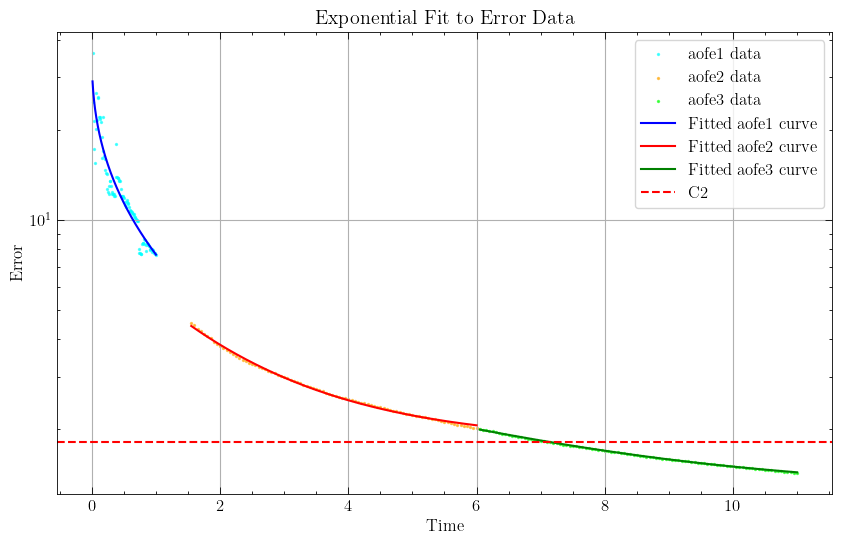

In [112]:
from scipy.optimize import curve_fit

# Define the exponential decay function
# def exp_func(t, A, B, C): return A * np.exp(-B * t) + C
def exp_func(t, A, B, C, tau): return A * np.exp(-(t / tau)**B) + C

p1 = (max(aofe1), 1, 0.5, min(aofe1))
p2 = (max(aofe2), 1, 0.5, min(aofe2))
p3 = (max(aofe3), 1, 0.5, min(aofe3))



bounds1 = ([0, 0, 0, 0], [max(aofe1), 2, np.min(aofe12), np.inf])
bounds2 = ([0, 0, 0, 0], [max(aofe2), 2, np.min(aofe12), np.inf])
bounds3 = ([0, 0, 0, 0], [max(aofe3), 2, np.min(aofe3), np.inf])
# print(f"{min(aofe12)=:.3f}, {min(aofe3)=:.3f}")

# # Fit exponential function to aofe12 data
# popt_12, pcov_12 = curve_fit(exp_func, t12, aofe12, p0=(1, 0.1, 0))  # Initial guesses for A, B, C
# A12, B12, C12 = popt_12

popt_1, pcov_1 = curve_fit(exp_func, t1, aofe1, p0=p1, bounds=bounds1, maxfev=10000)  # Initial guesses for A, B, C
A1, B1, C1, tau1 = popt_1

popt_2, pcov_2 = curve_fit(exp_func, t2[10:], aofe2[10:], p0=p2, bounds=bounds2, maxfev=10000)  # Initial guesses for A, B, C
A2, B2, C2, tau2 = popt_2

# Fit exponential function to aofe3 data
popt_3, pcov_3 = curve_fit(exp_func, t3, aofe3, p0=p3, bounds=bounds3, maxfev=10000)  # Initial guesses for A, B, C
A3, B3, C3, tau3 = popt_3

# Print fitted parameters
# print(f"Fitted parameters for aofe12: A = {A12:.3f}, B = {B12:.3f}, C = {C12:.3f}")
print(f"Fitted parameters for aofe1: A = {A1:.3f}, B = {B1:.3f}, C = {C1:.3f}, tau = {tau1:.3f}")
print(f"Fitted parameters for aofe2: A = {A2:.3f}, B = {B2:.3f}, C = {C2:.3f}, tau = {tau2:.3f}")
print(f"Fitted parameters for aofe3: A = {A3:.3f}, B = {B3:.3f}, C = {C3:.3f}, tau = {tau3:.3f}")

# Generate smooth curves for plotting
# t12_smooth = np.linspace(min(t12), max(t12), 500)
t1_smooth = np.linspace(min(t1), max(t1), 500)
t2_smooth = np.linspace(min(t2[10:]), max(t2[10:]), 500)
t3_smooth = np.linspace(min(t3), max(t3), 500)

# fit_12 = exp_func(t12_smooth, *popt_12)
fit_1 = exp_func(t1_smooth, *popt_1)
fit_2 = exp_func(t2_smooth, *popt_2)
fit_3 = exp_func(t3_smooth, *popt_3)

# Plot the results
plt.figure(figsize=(10, 6))

# Original data
# plt.scatter(t12, aofe12, color='cyan', label='aofe12 data', alpha=0.6, s=2)
plt.scatter(t1, aofe1, color='cyan', label='aofe1 data', alpha=0.6, s=2)
plt.scatter(t2[10:], aofe2[10:], color='orange', label='aofe2 data', alpha=0.6, s=2)
plt.scatter(t3, aofe3, color='lime', label='aofe3 data', alpha=0.6, s=2)

# Fitted curves
# plt.plot(t12_smooth, fit_12, color='blue', label='Fitted aofe12 curve')
plt.plot(t1_smooth, fit_1, color='blue', label='Fitted aofe1 curve')
plt.plot(t2_smooth, fit_2, color='red', label='Fitted aofe2 curve')
plt.plot(t3_smooth, fit_3, color='green', label='Fitted aofe3 curve')

# plt.axhline(y=C1, color='blue', linestyle='--', label='C1')
plt.axhline(y=C2, color='red', linestyle='--', label='C2')
# plt.axhline(y=C3, color='green', linestyle='--', label='C3')

# Add labels and legend
plt.xlabel('Time'); plt.ylabel('Error'); plt.title('Exponential Fit to Error Data'); plt.legend(); plt.grid(); plt.yscale('log')
plt.show()


Segment 1: A = 12.194, B = 0.183, C = 2.019
Segment 2: A = 12.694, B = 0.000, C = 0.646
Segment 3: A = 5.823, B = 0.774, C = 2.019
Segment 4: A = 5.899, B = 1.302, C = 0.000
Segment 5: A = 7.689, B = 0.474, C = 0.000
Segment 6: A = 6.087, B = 1.879, C = 2.019
Segment 7: A = 4.756, B = 1.207, C = 1.733
Segment 8: A = 5.606, B = 0.975, C = 1.071
Segment 9: A = 5.399, B = 0.548, C = 0.000
Segment 10: A = 5.648, B = 0.574, C = 0.000


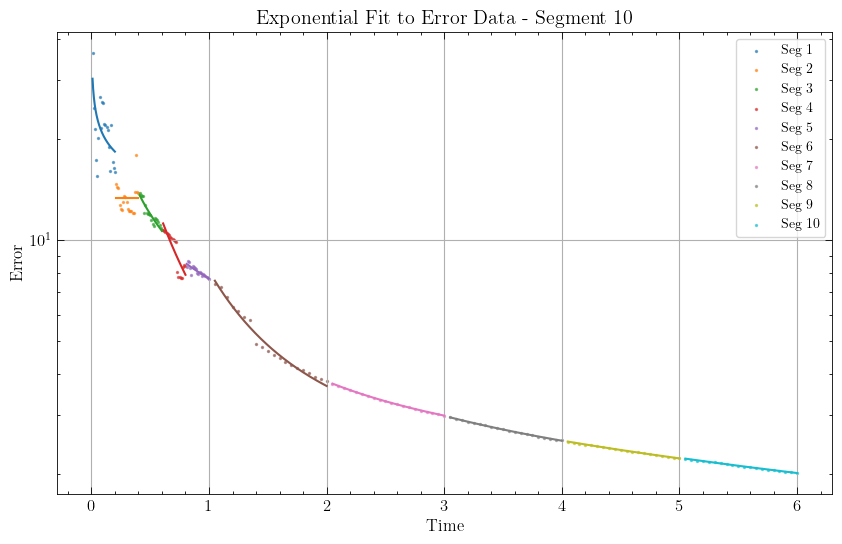

In [122]:
fit_type = "exp"
fit_type = "power"
# fit_type = "decay"

segments = 10
# split the aofe12 into segments
error_segments = np.array_split(aofe12, segments)
time_segments = np.array_split(t12, segments)

if fit_type == "exp":
    def exp_func(t, A, B, C): return A * np.exp(-B * t) + C
elif fit_type == "power":
    def exp_func(t, A, B, C): return A * t**(-B) + C
elif fit_type == "decay": 
    def exp_func(t, A, B, C, tau): return A * np.exp(-(t / tau)**B) + C




# loop through the segments. create inital guesses and bounds for each segment, then fit the exponential function
plt.figure(figsize=(10, 6))
segment_parameters = []
fit_segments = []
time_smooth_segments = []


for i in range(segments):
    
    if fit_type == "exp":
        p = (1, 1, 0)
        bounds = ([0, 0, 0], [np.inf, np.inf, np.min(error_segments[i])])
    elif fit_type == "power":
        p = (np.max(aofe1), 1, 1)
        ([0, 0, 0], [np.inf, np.inf, np.min(error_segments[i])])
    elif fit_type == "decay":
        p = (np.max(error_segments[i]), 1, 0.5, np.min(error_segments[i]))
        bounds = ([0, 0, 0, 0], [np.inf, 2, np.min(error_segments[i]), np.inf])
    
    popt, pcov = curve_fit(exp_func, time_segments[i], error_segments[i], p0=p, bounds=bounds, maxfev=10000)
    segment_parameters.append(popt)
    
    if fit_type == "exp": print(f"Segment {i+1}: A = {popt[0]:.3f}, B = {popt[1]:.3f}, C = {popt[2]:.3f}")
    if fit_type == "power": print(f"Segment {i+1}: A = {popt[0]:.3f}, B = {popt[1]:.3f}, C = {popt[2]:.3f}")
    if fit_type == "decay": print(f"Segment {i+1}: A = {popt[0]:.3f}, B = {popt[1]:.3f}, C = {popt[2]:.3f}, tau = {popt[3]:.3f}")

    # Generate smooth curves for plotting
    time_smooth = np.linspace(min(time_segments[i]), max(time_segments[i]), 500)
    fit = exp_func(time_smooth, *popt)
    
    fit_segments.append(fit)
    time_smooth_segments.append(time_smooth)
    
    # Plot the results
    plt.scatter(time_segments[i], error_segments[i], alpha=0.6, s=2, label=f'Seg {i+1}')#, color='cyan')
    plt.plot(time_smooth, fit)#, color='blue', label=f'Fitted Segment {i+1} curve')
    
plt.xlabel('Time'); plt.ylabel('Error'); plt.title(f'Exponential Fit to Error Data - Segment {i+1}'); plt.legend(fontsize=10); plt.grid(); plt.yscale('log')
plt.show()



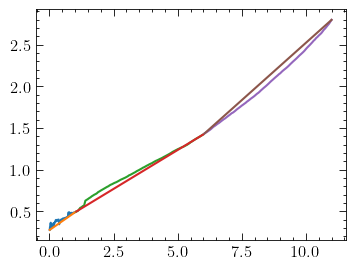

In [141]:
def tf(x): return 1/np.log(x)

plt.plot(t1, tf(aofe1), label="MFI_1")
plt.plot([t1[0], t1[-1]], [tf(aofe1[0]), tf(aofe1[-1])], label="MFI_1")

plt.plot(t2, tf(aofe2), label="MFI_1 and MFI_2_1")
plt.plot([t2[0], t2[-1]], [tf(aofe2[0]), tf(aofe2[-1])], label="MFI_1 and MFI_2_1")

plt.plot(t3, tf(aofe3), label="MFI_1 and MFI_2_1")
plt.plot([t3[0], t3[-1]], [tf(aofe3[0]), tf(aofe3[-1])], label="MFI_1 and MFI_2_1")